# Spinal motoneuron firing properties mature from rostral to caudal during post-natal development of the mouse 

### Calvin C. Smith & Robert M. Brownstone
### Sobell Department of Neuromuscular Diseases, Institute of Neurology, University College London, London WC1N 3BG, UK


### Analysis notebook

In [1]:
#importing neccssary packages 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; sns.set()
from scipy.stats import shapiro
import matplotlib.ticker
import matplotlib.image as mpimg

In [2]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

### Importing the file
All data was loaded into an excel file and loaded using the code below. The file intially included cells from animals aged over P21 but this introduced a bias between cervical and lumbar segments in the older age group. Therefore only cells under P21 were analysed. 

In [ ]:
#importing sheet2 from excel file.
%matplotlib inline
MN_dev = pd.read_excel(r"Smith_Brownstone_2020_main_data.xlsx") 
#download file and insert new location in order to re-run analysis 
MN_dev=MN_dev.drop(MN_dev[MN_dev['Age']>=21].index) #removing cells of age greater than P21

In [93]:
#importing sheet2 from excel file.
%matplotlib inline
MN_dev = pd.read_excel(r"C:\Users\csmith\OneDrive - University College London\C_vs_L_Dev_Project\Muscarine_development_analysis_10.xlsx", "allfinal") 
#download file and insert new location in order to re-run analysis 
MN_dev=MN_dev.drop(MN_dev[MN_dev['Age']>=21].index) #removing cells of age greater than P21


In [96]:
MN_dev.head(1-70)

,CellID,agegroup,Neuraxis,Age,Conditions,AP_HW,fAHP_amp,Max_rise,max_fall,spike_slope,...,Capacitance,Rheobase,Resistance,mAHPamp,mAHPdecay,ADP,AP_amp,RMP,Sag_slope,thresh
0,BG_22_03_18_C1,3,1,3.0,Lumbar_P3,1.678721,-22.304967,96.90,37.40,25.000000,...,151.658911,0.060,99.000000,9.090,78.040000,0.00001,65.500000,-65.20,12.842815,-47.730575
1,BG_22_03_18_C2,3,1,3.0,Lumbar_P3,1.189504,-7.139007,205.70,65.30,18.400000,...,237.197836,1.400,64.700000,6.710,78.250000,0.00001,78.600000,-65.00,6.626674,-47.126260
2,BG_22_03_18_C3,3,1,3.0,Lumbar_P3,0.986297,-5.356366,168.70,72.60,32.500000,...,212.895082,0.360,52.800000,4.010,46.525000,0.00001,71.760000,-65.00,7.120768,-42.754110
3,BH_22_03_18_C1,3,1,3.0,Lumbar_P3,1.085608,-7.072135,119.40,57.30,36.666667,...,292.361884,0.330,46.700000,2.390,45.235000,2.46000,60.700000,-60.90,1.992119,-31.941729
4,BH_22_03_18_C2,3,1,3.0,Lumbar_P3,1.195000,-7.807000,114.80,53.70,32.500000,...,206.911548,0.250,81.400000,5.550,62.500000,0.33000,62.230000,-58.00,17.293295,-34.633796
5,BJ_26_04_18_C2,3,1,2.0,Lumbar_P3,1.142020,-20.261138,193.90,73.40,36.000000,...,202.346721,0.180,122.000000,9.170,84.060000,0.29100,80.800000,-63.90,11.114427,-41.454809
6,BJ_26_04_18_C3,3,1,2.0,Lumbar_P3,1.042751,-10.258114,192.20,75.80,40.000000,...,183.628800,0.270,62.500000,5.600,47.870000,1.67000,77.400000,-64.30,5.086264,-41.671753
7,BK_27_04_18_C1,3,1,3.0,Lumbar_P3,1.087279,-11.768600,168.50,75.40,25.714286,...,253.468531,0.350,57.200000,5.266,102.500000,0.71000,81.200000,-65.00,4.577636,-36.278273
8,BK_27_04_18_C2,3,1,3.0,Lumbar_P3,1.008500,13.964000,172.40,81.20,23.157895,...,286.368000,0.480,49.700000,5.380,78.185000,0.91000,74.580000,-63.90,2.702078,-29.991653
9,BK_27_04_18_C3,3,1,3.0,Lumbar_P3,1.466400,-10.903753,135.60,47.80,73.333333,...,151.658911,0.090,189.100000,0.560,18.055000,1.65600,77.000000,-65.00,14.128509,-37.178732


In [5]:
MN_means1=MN_dev.groupby(['agegroup', 'Neuraxis']).agg({'mean','std'})
#Sumry_MN_Dev= MN_means1.il
MN_means1 

Age               AP_HW             fAHP_amp  \
                        mean       std      mean       std       mean   
agegroup Neuraxis                                                       
3        1          2.823529  0.392953  1.179432  0.233541  -8.633328   
         2          2.647059  0.492592  1.058802  0.243091 -10.976646   
7        1          6.600000  0.498273  0.995086  0.178802  -9.892005   
         2          6.793103  0.412251  0.830475  0.229550 -14.265699   
14       1         17.055556  1.984416  0.748707  0.210660 -15.997678   
         2         16.227273  1.659943  0.605344  0.122452 -18.467175   

                               Max_rise               max_fall             \
                        std        mean        std        mean        std   
agegroup Neuraxis                                                           
3        1         7.462168  151.197647  32.791883   65.927059  13.698748   
         2         4.079580  149.667647  51.156919   77.421176  21.998844   
7        1         3.521326  166.470000  33.875321   80.666667  15.271369   
         2         4.801584  191.685000  43.654439  100.212333  27.533728   
14       1         3.615153  211.938333  52.512928  114.707222  34.137677   
         2         5.448195  254.748182  45.998881  148.562273  34.680017   

                   ...       ADP               AP_amp                  RMP  \
                   ...      mean       std       mean       std       mean   
agegroup Neuraxis  ...                                                       
3        1         ...  0.515711  0.755601  69.232415  7.829879 -64.887647   
         2         ...  0.269477  0.446116  63.194472  9.160067 -66.622209   
7        1         ...  0.675258  0.724297  67.781532  6.055304 -65.248000   
         2         ...  1.201632  0.911167  68.710329  7.380488 -65.073333   
14       1         ...  3.004556  1.627163  70.357588  8.472827 -67.408889   
         2         ...  3.374318  1.261517  73.078149  7.676219 -66.188182   

                            Sag_slope               thresh            
                        std      mean       std       mean       std  
agegroup Neuraxis                                                     
3        1         4.439394  7.725162  7.228613 -35.888938  9.510586  
         2         3.120798  7.591977  7.556066 -37.113553  8.432494  
7        1         3.159116  4.515516  4.665350 -37.359666  7.179352  
         2         2.779968  2.691202  2.024798 -33.453583  8.305378  
14       1         2.662358  6.218146  3.993654 -34.849501  8.247662  
         2         2.393190  5.529260  2.895026 -34.983517  6.038398  

[6 rows x 52 columns]

In [4]:
columns2= ['Age',"Max initial freq (Hz)","Max freq/500ms pulse (Hz)","Max final freq (Hz)","Max Spikes/500ms",
           'Final freq gain (Hz/nA)',"Initial freq gain (Hz/nA)",'AP HW (ms)',
           "Mean freq slope (Hz/nA)",'Resistance (M\u2126)', 'Tau (s)','Sag amplitude (mV)',
           'Capacitance (pF)','Rheobase (nA)','RMP (mV)','Spike no. gain (n/nA)',
           'AP max depol rate (mV/s)','AP max repol rate (mV/s)','mAHP amplitude (mV)',
           'mAHP 1/2 decay (ms)','ADP amplitude (mV)', 'AP amplitude (mV)',
           'fAHP amplitude (mV)']

## Summary table for effect of age on all MNs. 
including means/SD and n

In [7]:
mastertable=pd.pivot_table(MN_dev, index= 'agegroup', values= MN_dev, aggfunc= [np.mean, np.std,np.count_nonzero])
mastertable

mean                                                           \
               ADP     AP_HW     AP_amp        Age Capacitance Ffinit_slope   
agegroup                                                                      
3         0.392594  1.119117  66.213444   2.735294  217.789552   142.933008   
7         0.931697  0.912781  68.245930   6.694915  332.004897   112.778048   
14        3.207925  0.669857  71.853896  16.600000  369.096583    73.451994   

                                                                              \
              Max_FF    Max_rise Max_spikes Mean_FF_slop Neuraxis        RMP   
agegroup                                                                       
3         110.078293  150.432647  23.794118    58.106153     1.50 -65.754928   
7         141.180525  179.077500  27.716667    41.521952     1.50 -65.160667   
14        203.754799  235.483750  34.525000    20.868522     1.55 -66.737500   

                                                                        \
         Resistance  Rheobase   SS_slope   Sag_max Sag_slope      Tau1   
agegroup                                                                 
3         76.181765  0.410235  51.198073  6.857659  7.662732  0.015655   
7         47.453769  0.667450  33.863406  3.197131  3.587898  0.013190   
14        27.906500  1.382625  18.222903  7.122051  5.829544  0.008815   

                                                                             \
             Tau1ms   fAHP_amp   mAHPamp  mAHPdecay maxFFsteady    max_fall   
agegroup                                                                      
3         15.654886  -9.804987  5.308794  72.372549   45.097480   71.674118   
7         13.190130 -12.078852  4.248103  65.627954   53.497100   90.439500   
14         8.814743 -17.355901  3.132275  67.311582   63.011152  133.327500   

                                                 std                      \
           max_mean spike_slope     thresh       ADP     AP_HW    AP_amp   
agegroup                                                                   
3         49.881402   28.463729 -36.501246  0.623641  0.242577  8.932921   
7         57.880143   20.694252 -35.473971  0.852415  0.220234  6.709405   
14        75.189270   10.561176 -34.923210  1.430292  0.180653  8.056045   

                                                                              \
               Age Capacitance Ffinit_slope     Max_FF   Max_rise Max_spikes   
agegroup                                                                       
3         0.447811   64.331514    69.075010  24.969069  42.318169   5.061916   
7         0.464396  138.334235    80.446015  38.567645  40.772440   8.770311   
14        1.836943  183.128763    29.045113  40.328469  52.977192  10.374988   

                                                                           \
         Mean_FF_slop  Neuraxis       RMP Resistance  Rheobase   SS_slope   
agegroup                                                                    
3           24.840623  0.507519  3.879767  39.031584  0.304263  23.057719   
7           21.158730  0.504219  2.951577  33.257312  0.399506  16.801294   
14           7.524735  0.503831  2.559674  16.123020  0.892674   6.456637   

                                                                      \
           Sag_max Sag_slope      Tau1    Tau1ms  fAHP_amp   mAHPamp   
agegroup                                                               
3         5.507768  7.263485  0.005746  5.746125  6.040032  2.130645   
7         3.332790  3.661081  0.005407  5.407056  4.721267  2.254440   
14        4.590022  3.386288  0.003632  3.631943  4.819545  1.431308   

                                                                             \
          mAHPdecay maxFFsteady   max_fall   max_mean spike_slope    thresh   
agegroup                                                                      
3         21.225348    9.030672  18.964602  10.330972   12.307081  

#### renaming columns for figures

In [6]:
MN_dev_betterlabels1=MN_dev.rename(columns={'Max_FF':"Max initial freq (Hz)", 'max_mean':"Max freq/500ms pulse (Hz)",
                                             'maxFFsteady':"Max final freq (Hz)",'Max_spikes':"Max Spikes/500ms",
                                             'SS_slope':'Final freq gain (Hz/nA)', 'Ffinit_slope':"Initial freq gain (Hz/nA)",
                                             'mAHPamp':'mAHP amplitude (mV)','AP_HW':'AP HW (ms)', 'Mean_FF_slop':"Mean freq slope (Hz/nA)",
                                            "Resistance":'Resistance (M\u2126)', "Tau1":'Tau (s)', "Tau1ms":'Tau (ms)', 'Sag_max':'Sag amplitude (mV)', 
                                   'Capacitance':'Capacitance (pF)', 'Rheobase':'I min (nA)', 'spike_slope':'Spike no. gain (n/nA)','Sag_slope':'Sag slope (mV/nA)',
                                            'Max_rise':'AP max depol rate (mV/s)', 'max_fall':'AP max repol rate (mV/s)',
                                          'mAHPdecay':'mAHP 1/2 decay (ms)', 'ADP':'ADP amplitude (mV)','RMP':'RMP (mV)',
                                            'AP_amp':'AP amplitude (mV)', 'fAHP_amp':'fAHP amplitude (mV)', 'thresh':'Threshold (mV)'}) 

## Summary table of means/std/counts for age by neuraxis
1= lumbar
2= Cervical 

In [8]:
pd.set_option('display.max_columns', 500)
mastertable=pd.pivot_table(MN_dev, index= ['agegroup','Neuraxis'], values= MN_dev, aggfunc= [np.mean, np.std,np.count_nonzero])
mastertable

mean                                              \
                        ADP     AP_HW     AP_amp        Age Capacitance   
agegroup Neuraxis                                                         
3        1         0.515711  1.179432  69.232415   2.823529  223.361921   
         2         0.269477  1.058802  63.194472   2.647059  212.217183   
7        1         0.675258  0.995086  67.781532   6.600000  310.939967   
         2         1.201632  0.830475  68.710329   6.793103  353.069828   
14       1         3.004556  0.748707  70.357588  17.055556  404.594525   
         2         3.374318  0.605344  73.078149  16.227273  340.052812   

                                                                   \
                  Ffinit_slope      Max_FF    Max_rise Max_spikes   
agegroup Neuraxis                                                   
3        1          149.269955  114.111239  151.197647  23.058824   
         2          136.596061  106.045347  149.667647  24.529412   
7        1          139.284920  123.825796  166.470000  23.400000   
         2           86.271176  158.535253  191.685000  32.033333   
14       1           72.115539  184.679122  211.938333  29.944444   
         2           74.545456  219.362172  254.748182  38.272727   

                                                                           \
                  Mean_FF_slop        RMP Resistance  Rheobase   SS_slope   
agegroup Neuraxis                                                           
3        1           60.525619 -64.887647  78.812941  0.450000  51.144323   
         2           55.686686 -66.622209  73.550588  0.370471  51.251823   
7        1           50.603327 -65.248000  52.096009  0.523600  39.915012   
         2           32.440577 -65.073333  42.811528  0.811300  27.811799   
14       1           20.896029 -67.408889  30.822778  1.500056  18.945592   
         2           20.846017 -66.188182  25.520455  1.286545  17.631612   

                                                                       \
                    Sag_max Sag_slope      Tau1     Tau1ms   fAHP_amp   
agegroup Neuraxis                                                       
3        1         6.675894  7.725162  0.016527  16.527426  -8.633328   
         2         7.039424  7.591977  0.014782  14.782345 -10.976646   
7        1         4.023460  4.515516  0.013500  13.499664  -9.892005   
         2         2.370801  2.691202  0.012881  12.880597 -14.265699   
14       1         7.744706  6.218146  0.009556   9.556100 -15.997678   
         2         6.640909  5.529260  0.008208   8.208178 -18.467175   

                                                                           \
                    mAHPamp  mAHPdecay maxFFsteady    max_fall   max_mean   
agegroup Neuraxis                                                           
3        1         5.270353  67.085294   43.445725   65.927059  49.621717   
         2         5.347235  77.659804   46.749235   77.421176  50.141087   
7        1         4.102300  74.027167   46.439275   80.666667  49.563252   
         2         4.401579  56.786677   60.554925  100.212333  66.197033   
14       1         2.972833  73.791247   55.541556  114.707222  68.180519   
         2         3.262727  62.010037   69.122639  148.562273  80.923702   

                                               std                      \
                  spike_slope     thresh       ADP     AP_HW    AP_amp   
agegroup Neuraxis                                                        
3        1          29.189039 -35.888938  0.755601  0.233541  7.829879   
         2          27.738420 -37.113553  0.446116  0.243091  9.160067   
7        1          25.075463 -37.359666  0.724297  0.178802  6.055304   
         2          16.459082 -33.453583  0.911167  0.229550  7.380488   
14       1          10.670227 -34.849501  1.627163  0.210660  8.472827   
         2          10.471952 -34.983517  1.261517  0.122452  7.676219   

            

### Figure 2. Development of Passive properties


1. WCC

2. IR

3. Tau 

4. RMP

### Generating graphs for figure 2. 

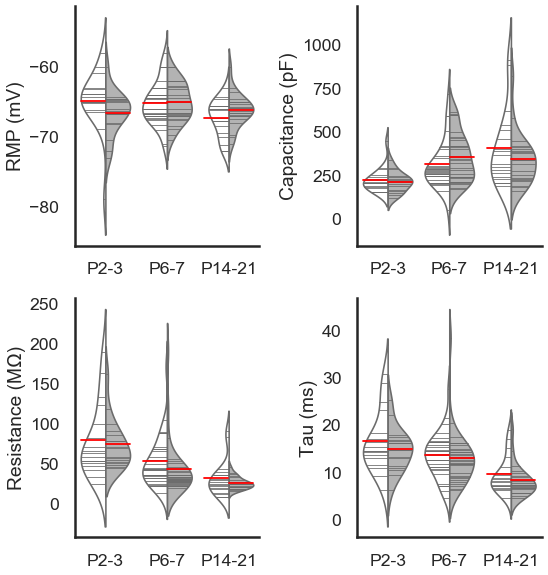

In [123]:

meanpointprops = dict(marker='-', markeredgecolor='r',
                      markerfacecolor='none',markeredgewidth=2,markersize=8)
medianprops = dict(linestyle='-.', linewidth=0, color='firebrick')
meanlineprops = dict(linestyle='-', linewidth=1.8, color='red')
All_passive = plt.figure(figsize=(8, 12))
sns.set_style("white")
sns.set_context("poster", font_scale=0.8, rc={"lines.linewidth": 1.6})
All_passive= MN_dev_betterlabels1[['RMP (mV)',"Capacitance (pF)","Resistance (M\u2126)","Tau (ms)", ]]
plot_number=0
for column in All_passive:
    plot_number +=1 
    plt1=plt.subplot(3,2,plot_number)
    plt1=sns.boxplot(x="agegroup", y=column,hue="Neuraxis", medianprops=medianprops,
                     meanprops=meanlineprops,meanline=True,whis=False,showcaps=False,
                     showfliers=False,showmeans=True, showbox=False,data=MN_dev_betterlabels1)
    plt1=sns.violinplot(x="agegroup", y=column,hue="Neuraxis",
            kind="violin", inner="stick",split=True,
            palette=["white", "0.7"],scale="count",data=MN_dev_betterlabels1)
    sns.despine()
    plt1.get_legend().set_visible(False)
    plt1.set_xlabel('')
    plt1.set(xticklabels=["P2-3", "P6-7", "P14-21"])
    plt.tight_layout()

plt.savefig("All_passive.png", dpi=800) 

### Summary (figure2 H)

In [24]:
#importing sheet2 from excel file.
%matplotlib inline
Sig_graphicPassive = pd.read_excel(r"C:\Users\csmith\OneDrive - University College London\C_vs_L_Dev_Project\Data_sigdif_graphic_C_vs_L_paper.xlsx", "Fig2Passive")
#Sig_graphicPassive

### Schematic for passive properties

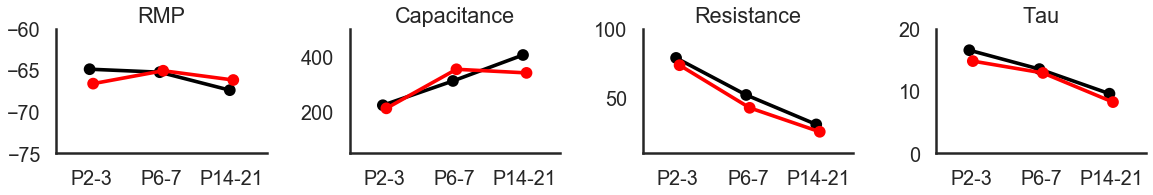

In [118]:
# Draw a schematicto show pulse as a function of three categorical factors
sns.set_style("white")
sns.set_context("poster", font_scale=0.9, rc={"lines.linewidth": 1.6})
g = sns.catplot(x="Age group", y="actual", hue="Region", col="Measure",
                capsize=1.6, palette=("black","red"), height=3.5, aspect=1.2,
                kind="point", dodge=True, markers=("o","o"), legend=False,scale=1.25,sharex=True,sharey=False,data=Sig_graphicPassive)
axes = g.axes.flatten()
axes[0].set_title("RMP")
axes[1].set_title("Capacitance")
axes[2].set_title("Resistance")
axes[3].set_title("Tau")
axes1 = g.axes.flatten()
axes1[0].set(ylim=(-75, -60))
axes1[1].set(ylim=(50, 500))
axes[2].set(ylim=(10, 100))
axes[3].set(ylim=(0, 20))
#g.set(ylim=(0, 8))
#g.set_yticklabels('')
g.set_xlabels('')
g.set_ylabels('')
plt.savefig("ALLPASSIVE_schematic.svg", dpi=800) 

### 2way Anovas for figure1

Resistance
Tau1
Capacitance
RMP

In [10]:
print('RMP')
model = ols('RMP ~ C(Neuraxis) + C(agegroup) + C(Neuraxis):C(agegroup)', data=MN_dev).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

RMP


,sum_sq,df,F,PR(>F)
C(Neuraxis),0.000045,1.0,0.000005,0.998273
C(agegroup),59.593928,2.0,3.112275,0.047884
C(Neuraxis):C(agegroup),40.783831,2.0,2.129924,0.123040
Residual,1225.473618,128.0,NaN,NaN


In [11]:
print('Capacitance')
model = ols('Capacitance ~ C(Neuraxis) + C(agegroup) + C(Neuraxis):C(agegroup)', data=MN_dev).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

Capacitance


,sum_sq,df,F,PR(>F)
C(Neuraxis),3.099435e+02,1.0,0.015840,0.900043
C(agegroup),4.559019e+05,2.0,11.649618,0.000022
C(Neuraxis):C(agegroup),6.860944e+04,2.0,1.753171,0.177357
Residual,2.504607e+06,128.0,NaN,NaN


In [12]:
print('Resistance')
model = ols('Resistance ~ C(Neuraxis) + C(agegroup) + C(Neuraxis):C(agegroup)', data=MN_dev).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

Resistance


,sum_sq,df,F,PR(>F)
C(Neuraxis),1674.479797,1.0,1.730413,1.907096e-01
C(agegroup),42417.825731,2.0,21.917360,6.521377e-09
C(Neuraxis):C(agegroup),132.264050,2.0,0.068341,9.339760e-01
Residual,123862.586333,128.0,NaN,NaN


In [14]:
print('Tau1')
model = ols('Tau1 ~ C(Neuraxis) + C(agegroup) + C(Neuraxis):C(agegroup)', data=MN_dev).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

Tau1


,sum_sq,df,F,PR(>F)
C(Neuraxis),0.000042,1.0,1.640190,2.026152e-01
C(agegroup),0.000892,2.0,17.410943,2.050313e-07
C(Neuraxis):C(agegroup),0.000008,2.0,0.148309,8.623124e-01
Residual,0.003279,128.0,NaN,NaN


### Figure 3. Transition Properties 1: Sag

5. Sag Max 

6. Sag slope

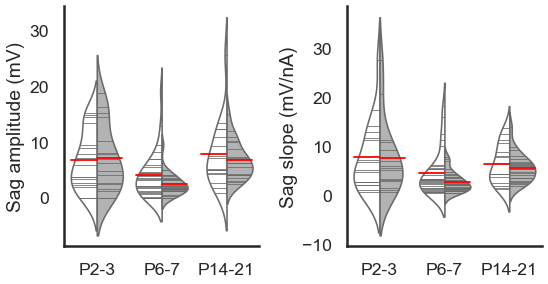

In [31]:
meanpointprops = dict(marker='-', markeredgecolor='r',
                      markerfacecolor='none',markeredgewidth=2,markersize=8)
medianprops = dict(linestyle='-.', linewidth=0, color='firebrick')
meanlineprops = dict(linestyle='-', linewidth=1.8, color='red')
All_passive = plt.figure(figsize=(8, 12))
sns.set_style("white")
sns.set_context("poster", font_scale=0.8, rc={"lines.linewidth": 1.6})
All_fig3= MN_dev_betterlabels1[["Sag amplitude (mV)","Sag slope (mV/nA)"]]
plot_number=0
for column in All_fig3:
    plot_number +=1 
    plt1=plt.subplot(3,2,plot_number)
    plt1=sns.boxplot(x="agegroup", y=column,hue="Neuraxis", medianprops=medianprops,
                     meanprops=meanlineprops,meanline=True,whis=False,showcaps=False,
                     showfliers=False,showmeans=True, showbox=False,data=MN_dev_betterlabels1)
    plt1=sns.violinplot(x="agegroup", y=column,hue="Neuraxis",
            kind="violin", inner="stick",split=True,
            palette=["white", "0.7"],scale="count",data=MN_dev_betterlabels1)
    sns.despine()
    plt1.get_legend().set_visible(False)
    plt1.set_xlabel('')
    plt1.set(xticklabels=["P2-3", "P6-7", "P14-21"])
    plt.tight_layout()

plt.savefig("Sag_final.png", dpi=800) 

In [ ]:
###Schematic for transition (sag) figure 3

In [55]:
#importing sage sheet from excel file.
%matplotlib inline
Sig_graphicSag= pd.read_excel(r"C:\Users\csmith\OneDrive - University College London\C_vs_L_Dev_Project\Data_sigdif_graphic_C_vs_L_paper.xlsx", "sagfig3")


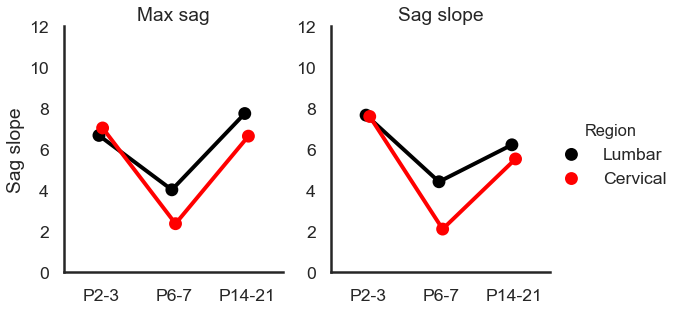

In [99]:

# Draw a schematicto show pulse as a function of three categorical factors
sns.set_style("white")
sns.set_context("poster", font_scale=0.8, rc={"lines.linewidth": 1.8})
g = sns.catplot(x="Age group", y="Development profile", hue="Region", col="Measure",
                capsize=1.8, palette=("black","red"), height=5, aspect=0.8,
                kind="point", dodge=True, markers=("o","o"), scale=1.22,sharex=True,sharey=False, data=Sig_graphicSag)

axes = g.axes.flatten()
axes[0].set_title("Max sag")
axes[1].set_title("Sag slope")
axes[0].set(ylim=(0, 12))
axes[1].set(ylim=(0, 12))
#g.set(ylim=(0, 12))
#g.set_yticklabels('')
g.set_xlabels('')
g.set_ylabels('Sag slope')
plt.savefig("Sag_schematic.svg", dpi=800) 


In [33]:
#importing sheet2 from excel file.
%matplotlib inline
sag1 = pd.read_excel(r"C:\Users\csmith\OneDrive - University College London\C_vs_L_Dev_Project\Muscarine_development_analysis_10.xlsx", "sag") 
#download file and insert new location in order to re-run analysis 


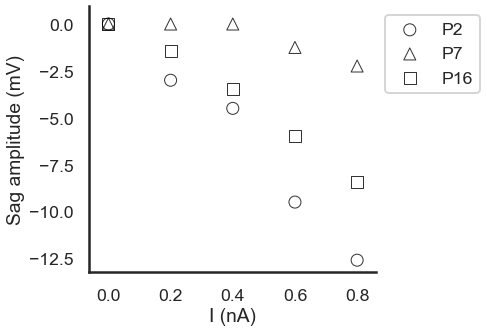

In [98]:
sns.set_context("poster", font_scale=0.8, rc={"lines.linewidth": 1.8})
g = sns.lmplot(x="Current", y="Sag", hue="Age1",markers=['o','^','s'], palette=['0','0','0'],
               scatter_kws = {'facecolors':'none'},fit_reg=False,legend=False,
               height=5, aspect=1.1,data=sag1)
g.set_xlabels('I (nA)')
g.set_ylabels('Sag amplitude (mV)')
plt.legend(title='', loc='best', bbox_to_anchor=(1, 0., 0.2, 1), labels=['P2', 'P7', 'P16'])
plt.savefig("Sag_graph.png", dpi=800) 


### two way anova-Sag


In [28]:
print('Sag_slope')
model = ols('Sag_slope ~ C(Neuraxis) + C(agegroup) + C(Neuraxis):C(agegroup)', data=MN_dev).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

Sag_slope


,sum_sq,df,F,PR(>F)
C(Neuraxis),36.991359,1.0,1.641187,0.202553
C(agegroup),358.555232,2.0,7.953969,0.000562
C(Neuraxis):C(agegroup),16.776624,2.0,0.372162,0.690010
Residual,2794.884438,124.0,NaN,NaN


##  Figure 2. Transition Properties 2: AP properties
7. AP HW

8. Depol rate

9. Repol rate

10. fAHP amp


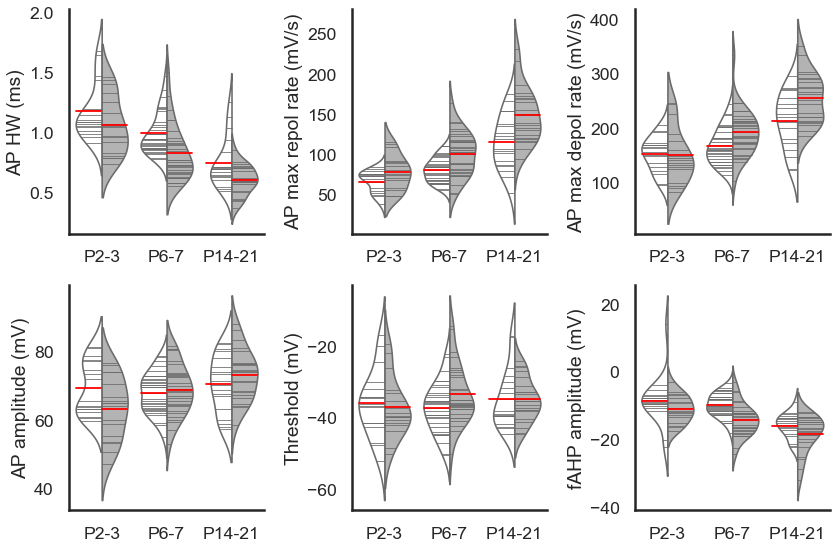

In [21]:
meanpointprops = dict(marker='-', markeredgecolor='r',
                      markerfacecolor='none',markeredgewidth=2,markersize=8)
medianprops = dict(linestyle='-.', linewidth=0, color='firebrick')
meanlineprops = dict(linestyle='-', linewidth=1.8, color='red')
All_passive = plt.figure(figsize=(12, 8))
sns.set_style("white")
sns.set_context("poster", font_scale=0.8, rc={"lines.linewidth": 1.6})
All_fig3= MN_dev_betterlabels1[["AP HW (ms)","AP max repol rate (mV/s)", "AP max depol rate (mV/s)","AP amplitude (mV)",'Threshold (mV)', "fAHP amplitude (mV)"]]
plot_number=0
for column in All_fig3:
    plot_number +=1 
    plt1=plt.subplot(2,3,plot_number)
    plt1=sns.boxplot(x="agegroup", y=column,hue="Neuraxis", medianprops=medianprops,
                     meanprops=meanlineprops,meanline=True,whis=False,showcaps=False,
                     showfliers=False,showmeans=True, showbox=False,data=MN_dev_betterlabels1)
    plt1=sns.violinplot(x="agegroup", y=column,hue="Neuraxis",
            kind="violin", inner="stick",split=True,
            palette=["white", "0.7"],scale="count",data=MN_dev_betterlabels1)
    sns.despine()
    plt1.get_legend().set_visible(False)
    plt1.set_xlabel('')
    plt1.set(xticklabels=["P2-3", "P6-7", "P14-21"])
    plt.tight_layout()
    
plt.savefig("Fig4_AP_final.png", dpi=400) 

In [61]:
# Significance schematic APs charcteristics
#importing AP sheet from excel file.
%matplotlib inline
Sig_graphicAPs= pd.read_excel(r"C:\Users\csmith\OneDrive - University College London\C_vs_L_Dev_Project\Data_sigdif_graphic_C_vs_L_paper.xlsx", "Fig4_transitionAPs")


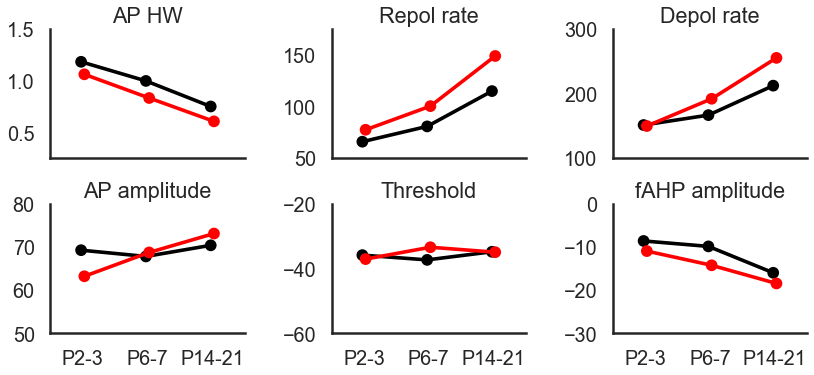

In [82]:
# Draw a schematicto show pulse as a function of three categorical factors
sns.set_style("white")
sns.set_context("poster", font_scale=0.9, rc={"lines.linewidth": 1.6})
g = sns.catplot(x="Age group", y="actual", hue="Region", col="Measure",
                capsize=1.6, palette=("black","red"), height=3, aspect=1.4,
                kind="point", dodge=True, markers=("o","o"), legend=False,scale=1.25,sharex=True,sharey=False, col_wrap=3,data=Sig_graphicAPs)
axes = g.axes.flatten()
axes[0].set_title("AP HW")
axes[1].set_title("Repol rate")
axes[2].set_title("Depol rate")
axes[3].set_title("AP amplitude")
axes[4].set_title("Threshold")
axes[5].set_title("fAHP amplitude")
axes1 = g.axes.flatten()
axes1[0].set(ylim=(0.25, 1.5))
axes1[1].set(ylim=(50, 175))
axes1[2].set(ylim=(100, 300))
axes1[3].set(ylim=(50, 80))
axes1[4].set(ylim=(-60, -20))
axes1[5].set(ylim=(-30, 0))
#g.set(ylim=(0, 7))
#g.set_yticklabels('')
g.set_xlabels('')
g.set_ylabels('')
plt.savefig("AP_schematic.svg", dpi=800) 

### 2way ANOVA

In [39]:
print('AP HW')
model = ols('AP_HW ~ C(Neuraxis) + C(agegroup) + C(Neuraxis):C(agegroup)', data=MN_dev).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

AP HW


,sum_sq,df,F,PR(>F)
C(Neuraxis),0.722923,1.0,17.319762,5.755803e-05
C(agegroup),3.618319,2.0,43.343782,4.224714e-15
C(Neuraxis):C(agegroup),0.010694,2.0,0.128097,8.798803e-01
Residual,5.342690,128.0,NaN,NaN


In [40]:
print('Max depol rate')
model = ols('Max_rise ~ C(Neuraxis) + C(agegroup) + C(Neuraxis):C(agegroup)', data=MN_dev).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

Max depol rate


,sum_sq,df,F,PR(>F)
C(Neuraxis),18640.125042,1.0,9.985722,1.969118e-03
C(agegroup),138253.540702,2.0,37.031979,2.042450e-13
C(Neuraxis):C(agegroup),9060.278943,2.0,2.426846,9.236892e-02
Residual,238934.749939,128.0,NaN,NaN


In [41]:
print('Max Repol rate')
model = ols('max_fall ~ C(Neuraxis) + C(agegroup) + C(Neuraxis):C(agegroup)', data=MN_dev).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

Max Repol rate


,sum_sq,df,F,PR(>F)
C(Neuraxis),15782.892290,1.0,23.890218,2.994350e-06
C(agegroup),73748.079807,2.0,55.815425,3.721374e-18
C(Neuraxis):C(agegroup),2417.607288,2.0,1.829740,1.646272e-01
Residual,84562.234680,128.0,NaN,NaN


In [42]:
print('AP AMP')
model = ols('AP_amp ~ C(Neuraxis) + C(agegroup) + C(Neuraxis):C(agegroup)', data=MN_dev).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

AP AMP


,sum_sq,df,F,PR(>F)
C(Neuraxis),3.273923,1.0,0.056445,0.812585
C(agegroup),621.638200,2.0,5.358768,0.005821
C(Neuraxis):C(agegroup),392.822793,2.0,3.386288,0.036893
Residual,7424.252797,128.0,NaN,NaN


In [15]:
print('threshold')
model = ols('thresh ~ C(Neuraxis) + C(agegroup) + C(Neuraxis):C(agegroup)', data=MN_dev).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

threshold


,sum_sq,df,F,PR(>F)
C(Neuraxis),61.131293,1.0,0.979439,0.324234
C(agegroup),43.653659,2.0,0.349707,0.705576
C(Neuraxis):C(agegroup),172.764247,2.0,1.384006,0.254355
Residual,7864.236248,126.0,NaN,NaN


In [34]:
print('fAHP')
model = ols('fAHP_amp ~ C(Neuraxis) + C(agegroup) + C(Neuraxis):C(agegroup)', data=MN_dev).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

fAHP


,sum_sq,df,F,PR(>F)
C(Neuraxis),362.088672,1.0,15.291400,1.486664e-04
C(agegroup),1098.480778,2.0,23.195021,2.535422e-09
C(Neuraxis):C(agegroup),31.898356,2.0,0.673551,5.116924e-01
Residual,3030.942237,128.0,NaN,NaN


### Figure 3. Firing properities: After potentials

11. mAHP amp

12. mAHP duration

13. ADP amp

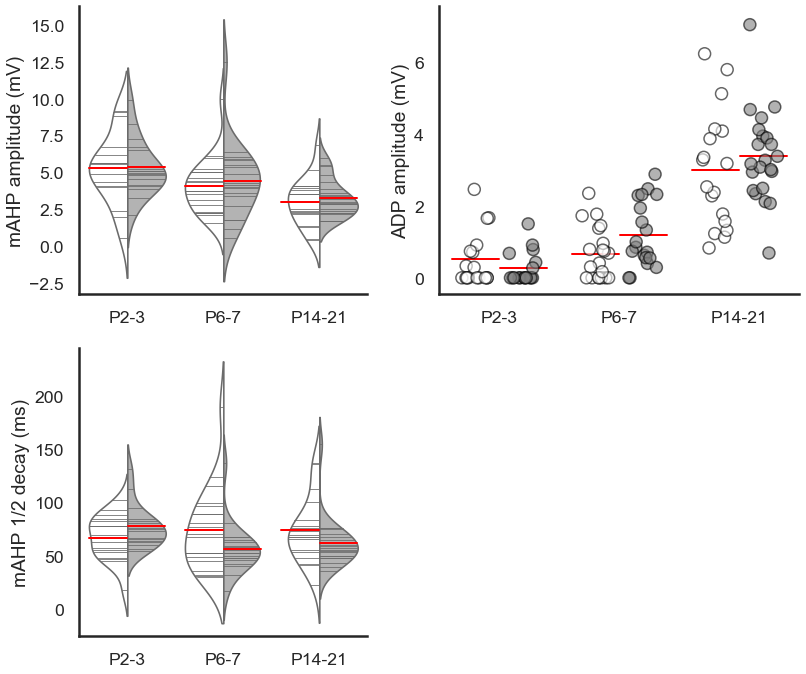

In [20]:
meanpointprops = dict(marker='d', markeredgecolor='r',
                      markerfacecolor='none',linewidth=5,markersize=8)
medianprops = dict(linestyle='-.', linewidth=0, color='firebrick')
meanlineprops = dict(linestyle='-', linewidth=2, color='red')
plt.figure(figsize=(10, 5))
sns.set_style("white")
sns.set_context("poster", font_scale=0.8, rc={"lines.linewidth": 1.6})

#MN_dev_betterlabels1[["mAHP amp (mV)","mAHP1/2decay (ms)"]]

plt1 = plt.axes([0,0, 0.4, 0.8])
plt1=sns.boxplot(x="agegroup", y="mAHP amplitude (mV)",hue="Neuraxis", medianprops=medianprops,
                     meanprops=meanlineprops,meanline=True,whis=False,showcaps=False,
                     showfliers=False,showmeans=True, showbox=False, data=MN_dev_betterlabels1)
plt1=sns.violinplot(x="agegroup", y="mAHP amplitude (mV)",hue="Neuraxis",
            kind="violin", inner="stick", split=True,
            palette=["white", "0.7"],scale="count",aspect=0.8,data=MN_dev_betterlabels1)
plt1.set(xticklabels=["P2-3", "P6-7", "P14-21"])
sns.despine()
plt1.get_legend().set_visible(False)
plt1.set_xlabel('')
#plt1.set_xlabel("P2-3", "P6-7", "P14-21")
#plt.tight_layout()


plt2 = plt.axes([0,-0.95, 0.4, 0.8])
plt2=sns.boxplot(x="agegroup", y="mAHP 1/2 decay (ms)",hue="Neuraxis", medianprops=medianprops,
                     meanprops=meanlineprops,meanline=True,whis=False,showcaps=False,
                     showfliers=False,showmeans=True, showbox=False, data=MN_dev_betterlabels1)
plt2=sns.violinplot(x="agegroup", y="mAHP 1/2 decay (ms)",hue="Neuraxis",
                    kind="violin", inner="stick", split=True,
                    palette=["white", "0.7"],scale="count",aspect=0.8,data=MN_dev_betterlabels1)
plt2.set(xticklabels=["P2-3", "P6-7", "P14-21"])
sns.despine()
plt2.get_legend().set_visible(False)
plt2.set_xlabel('')
#plt.tight_layout()

plt3 = plt.axes([0.5,0, 0.5, 0.8])
plt3=sns.set_context("poster", font_scale=0.8, rc={"lines.linewidth": 1.6})
plt3=sns.boxplot(x="agegroup", y='ADP amplitude (mV)',hue="Neuraxis", medianprops=medianprops,
                     meanprops=meanlineprops,meanline=True,whis=False,showcaps=False,
                     showfliers=False,showmeans=True, showbox=False, data=MN_dev_betterlabels1)
plt3=sns.stripplot(x="agegroup", y='ADP amplitude (mV)', hue='Neuraxis',data=MN_dev_betterlabels1, 
                   palette=['white','grey'], edgecolor='black',alpha=0.6, s=12,linewidth=1.5,jitter=0.25,dodge=True)
plt3.set(xticklabels=["P2-3", "P6-7", "P14-21"])
sns.despine()
plt3.get_legend().set_visible(False)
plt3.set_xlabel('')

plt.savefig("All_afterpol.png",dpi = 300,bbox_inches = 'tight')



In [84]:
# Significance schematic APs charcteristics
#importing AP sheet from excel file.
%matplotlib inline
Sig_graphicAfters= pd.read_excel(r"C:\Users\csmith\OneDrive - University College London\C_vs_L_Dev_Project\Data_sigdif_graphic_C_vs_L_paper.xlsx", "Fig5_afters")


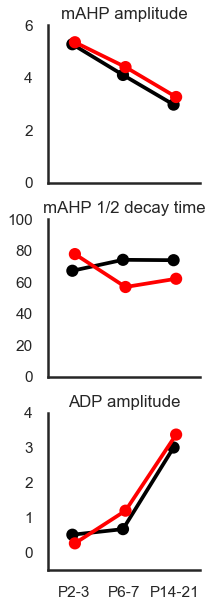

In [98]:
# Draw a schematicto show pulse as a function of three categorical factors
sns.set_style("white")
sns.set_context("poster", font_scale=0.7, rc={"lines.linewidth": 1.6})
g = sns.catplot(x="Age group", y="actual", hue="Region", col="Measure",
                capsize=1.6, palette=("black","red"), height=3, aspect=1.2,
                kind="point", dodge=True, markers=("o","o"), legend=False,scale=1.3,sharex=True,sharey=False,col_wrap=1,data=Sig_graphicAfters)
axes = g.axes.flatten()
axes[0].set_title("mAHP amplitude")
axes[1].set_title("mAHP 1/2 decay time")
axes[2].set_title("ADP amplitude")
axes1 = g.axes.flatten()
axes1[0].set(ylim=(0, 6))
axes1[1].set(ylim=(0, 100))
axes1[2].set(ylim=(-0.5, 4))
#g.set(ylim=(0, 8))
#g.set_yticklabels('')
g.set_xlabels('')
g.set_ylabels('')
plt.savefig("APAfters_schematic.svg", dpi=800) 

### two-way-ANOVA
mAHPdecay
ADP
AP_amp

In [17]:
print('ADP')
model = ols('ADP ~ C(Neuraxis) + C(agegroup) + C(Neuraxis):C(agegroup)', data=MN_dev).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

ADP


,sum_sq,df,F,PR(>F)
C(Neuraxis),1.593337,1.0,1.474025,2.273847e-01
C(agegroup),168.179588,2.0,77.792977,1.383590e-21
C(Neuraxis):C(agegroup),2.975254,2.0,1.376230,2.569620e-01
Residual,115.660929,107.0,NaN,NaN


In [16]:
print('mAHPdecay')
model = ols('mAHPdecay ~ C(Neuraxis) + C(agegroup) + C(Neuraxis):C(agegroup)', data=MN_dev).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

mAHPdecay


,sum_sq,df,F,PR(>F)
C(Neuraxis),1347.436081,1.0,1.762491,0.18714
C(agegroup),877.440907,2.0,0.573861,0.56507
C(Neuraxis):C(agegroup),3873.256652,2.0,2.533174,0.08416
Residual,81802.201090,107.0,NaN,NaN


In [18]:
print('mAHPamp')
model = ols('mAHPamp ~ C(Neuraxis) + C(agegroup) + C(Neuraxis):C(agegroup)', data=MN_dev).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

mAHPamp


,sum_sq,df,F,PR(>F)
C(Neuraxis),1.473415,1.0,0.374402,0.541912
C(agegroup),88.217059,2.0,11.208207,0.000038
C(Neuraxis):C(agegroup),0.281522,2.0,0.035768,0.964876
Residual,421.085417,107.0,NaN,NaN


### firing properties:Maximal spike output Fig 5
1. Imin
2. Maximum initial freq
3. Maximum spikes
4. maximum final freq


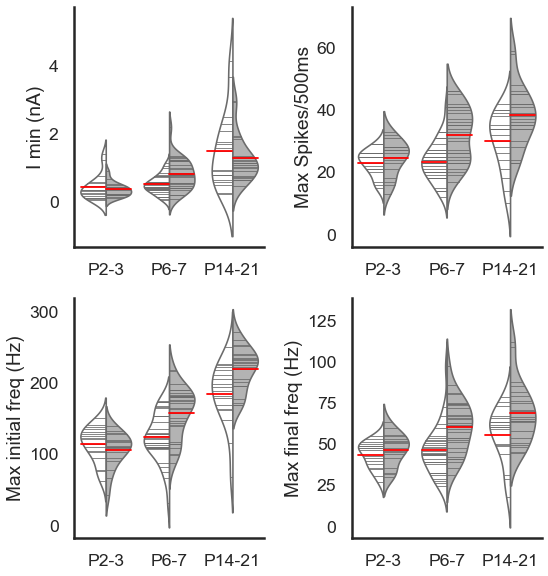

In [9]:
  meanpointprops = dict(marker='d', markeredgecolor='r',
                      markerfacecolor='none',linewidth=5,markersize=8)
medianprops = dict(linestyle='-.', linewidth=0, color='firebrick')
meanlineprops = dict(linestyle='-', linewidth=1.8, color='red')
All_maxfiring = plt.figure(figsize=(8, 12))
sns.set_style("white")
sns.set_context("poster", font_scale=0.8, rc={"lines.linewidth": 1.6})
All_maxfiring= MN_dev_betterlabels1[["I min (nA)","Max Spikes/500ms", "Max initial freq (Hz)","Max final freq (Hz)",]]
plot_number=0
for column in All_maxfiring:
    plot_number +=1 
    plt1=plt.subplot(3,2,plot_number)
    plt1=sns.boxplot(x="agegroup", y=column,hue="Neuraxis", medianprops=medianprops,
                     meanprops=meanlineprops,meanline=True,whis=False,showcaps=False,
                     showfliers=False,showmeans=True, showbox=False, data=MN_dev_betterlabels1)
    plt1=sns.violinplot(x="agegroup", y=column,hue="Neuraxis",
            kind="violin", inner="stick", split=True,
            palette=["white", "0.7"],scale="count",aspect=0.8,data=MN_dev_betterlabels1)
    sns.despine()
    plt1.get_legend().set_visible(False)
    plt1.set_xlabel('')
    plt.tight_layout()
    sns.despine()
    plt1.set(xticklabels=["P2-3", "P6-7", "P14-21"])
plt.savefig("All_maxfiring_CvsL_final.png",dpi = 300)

### Schematic for Sig difs Firing for figure 6

In [100]:
# Significance schematic APs charcteristics
#importing AP sheet from excel file.

%matplotlib inline
Sig_graphicFiring= pd.read_excel(r"C:\Users\csmith\OneDrive - University College London\C_vs_L_Dev_Project\Data_sigdif_graphic_C_vs_L_paper.xlsx", "Fig6_Firing")


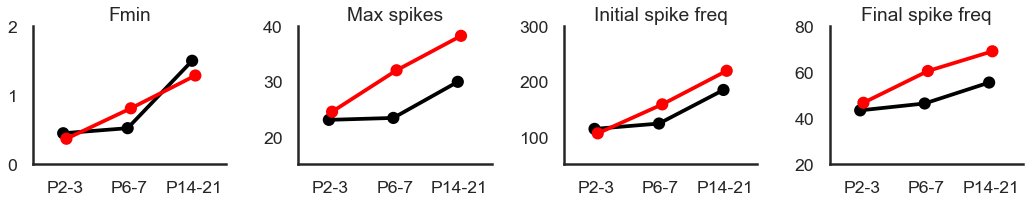

In [114]:
# Draw a schematicto show pulse as a function of three categorical factors
sns.set_style("white")
sns.set_context("poster", font_scale=0.8, rc={"lines.linewidth": 1.6})
g = sns.catplot(x="Age group", y="actual", hue="Region", col="Measure",
                capsize=1.6, palette=("black","red"), height=3.5, aspect=1.1,
                kind="point", dodge=True, markers=("o","o"), legend=False,scale=1.3,sharex=True,sharey=False,data=Sig_graphicFiring)
g.set(ylim=(0,4.5))
axes = g.axes.flatten()
axes[0].set_title("Fmin")
axes[1].set_title("Max spikes")
axes[2].set_title("Initial spike freq")
axes[3].set_title("Final spike freq")
axes1 = g.axes.flatten()
axes1[0].set(ylim=(0, 2))
axes1[1].set(ylim=(15, 40))
axes1[2].set(ylim=(50, 300))
axes1[3].set(ylim=(20, 80))
#g.set_yticklabels('')
g.set_xlabels('')
g.set_ylabels('')

plt.savefig("firing_schematic.svg", dpi=800) 

### two way ANOVA
Max_FF

max_mean

maxFFsteady

Max_spikes

In [35]:
print('Fmin')
model = ols('Rheobase ~ C(Neuraxis) + C(agegroup) + C(Neuraxis):C(agegroup)', data=MN_dev).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

Fmin


,sum_sq,df,F,PR(>F)
C(Neuraxis),0.069698,1.0,0.213415,6.448882e-01
C(agegroup),19.622849,2.0,30.042514,2.008017e-11
C(Neuraxis):C(agegroup),1.676940,2.0,2.567390,8.068273e-02
Residual,41.802838,128.0,NaN,NaN


In [20]:
print('Max_FF')
model = ols('Max_FF ~ C(Neuraxis) + C(agegroup) + C(Neuraxis):C(agegroup)', data=MN_dev).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

Max_FF


,sum_sq,df,F,PR(>F)
C(Neuraxis),18944.044608,1.0,17.169385,6.171339e-05
C(agegroup),168714.656596,2.0,76.454817,1.422897e-22
C(Neuraxis):C(agegroup),11588.997122,2.0,5.251676,6.426581e-03
Residual,141230.316786,128.0,NaN,NaN


In [21]:
print('max_mean')
model = ols('max_mean ~ C(Neuraxis) + C(agegroup) + C(Neuraxis):C(agegroup)', data=MN_dev).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

max_mean


,sum_sq,df,F,PR(>F)
C(Neuraxis),4325.148136,1.0,19.618151,2.007347e-05
C(agegroup),12181.912914,2.0,27.627563,1.061318e-10
C(Neuraxis):C(agegroup),1435.033015,2.0,3.254535,4.181552e-02
Residual,28219.732156,128.0,NaN,NaN


In [23]:
print('maxFFsteady')
model = ols('maxFFsteady ~ C(Neuraxis) + C(agegroup) + C(Neuraxis):C(agegroup)', data=MN_dev).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

maxFFsteady


,sum_sq,df,F,PR(>F)
C(Neuraxis),4193.892960,1.0,18.609176,0.000032
C(agegroup),5557.871616,2.0,12.330716,0.000013
C(Neuraxis):C(agegroup),713.656563,2.0,1.583321,0.209286
Residual,28846.968086,128.0,NaN,NaN


In [24]:
print('Max_spikes')
model = ols('Max_spikes ~ C(Neuraxis) + C(agegroup) + C(Neuraxis):C(agegroup)', data=MN_dev).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

Max_spikes


,sum_sq,df,F,PR(>F)
C(Neuraxis),1508.317440,1.0,24.883788,1.942000e-06
C(agegroup),2077.528711,2.0,17.137236,2.543460e-07
C(Neuraxis):C(agegroup),314.748499,2.0,2.596315,7.847034e-02
Residual,7758.651218,128.0,NaN,NaN


## Figure 7. Development of MN excitability 
1. mean spike slope
2. initial freq slope
3. final freq slope


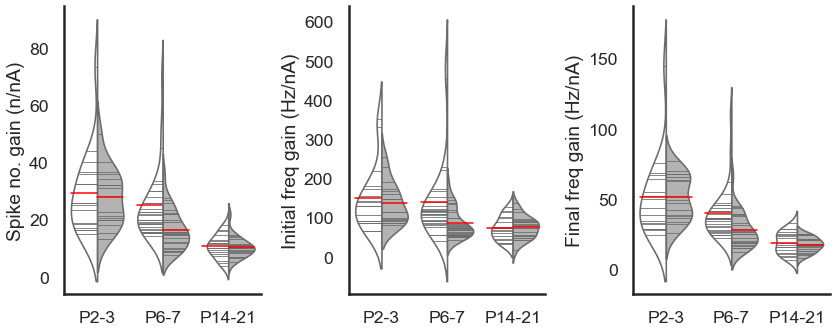

In [307]:
meanpointprops = dict(marker='d', markeredgecolor='r',
                      markerfacecolor='none',linewidth=5,markersize=8)
medianprops = dict(linestyle='-.', linewidth=0, color='firebrick')
meanlineprops = dict(linestyle='-', linewidth=1.5, color='red')
All_excite = plt.figure(figsize=(12, 5))
sns.set_style("white")
sns.set_context("poster", font_scale=0.8, rc={"lines.linewidth": 1.6})
All_excite= MN_dev_betterlabels1[["Spike no. gain (n/nA)","Initial freq gain (Hz/nA)","Final freq gain (Hz/nA)"]]
plot_number=0
for column in All_excite:
    plot_number +=1 
    plt1=plt.subplot(1,3,plot_number)
    plt1=sns.boxplot(x="agegroup", y=column,hue="Neuraxis", medianprops=medianprops,
                     meanprops=meanlineprops,meanline=True,whis=False,showcaps=False,
                     showfliers=False,showmeans=True, showbox=False, data=MN_dev_betterlabels1)
    plt1=sns.violinplot(x="agegroup", y=column,hue="Neuraxis",
            kind="violin", inner="stick", split=True,
            palette=["white", "0.7"],scale="count",aspect=0.8,data=MN_dev_betterlabels1)
    sns.despine()
    plt1.get_legend().set_visible(False)
    plt1.set_xlabel('')
    plt.tight_layout()
    sns.despine()
    plt1.set(xticklabels=["P2-3", "P6-7", "P14-21"])

plt.savefig("All_excite_Final_C_vs_L.png",dpi = 300)





### Schematic for Sig difs Firing for figure 6

In [115]:
# Significance schematic APs charcteristics
#importing AP sheet from excel file.
%matplotlib inline
Sig_graphicExcite= pd.read_excel(r"C:\Users\csmith\OneDrive - University College London\C_vs_L_Dev_Project\Data_sigdif_graphic_C_vs_L_paper.xlsx", "Fig7_excite")


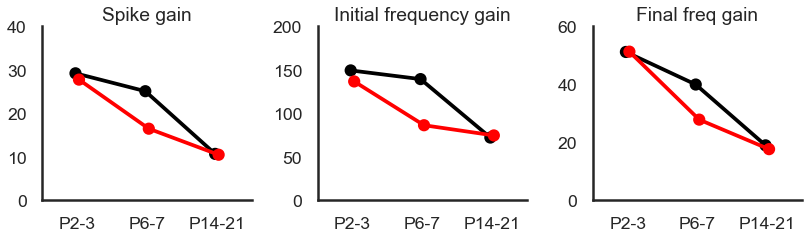

In [117]:
# Draw a schematicto show pulse as a function of three categorical factors
sns.set_style("white")
sns.set_context("poster", font_scale=0.8, rc={"lines.linewidth": 1.6})
g = sns.catplot(x="Age group", y="actual", hue="Region", col="Measure",
                capsize=1.6, palette=("black","red"), height=4, aspect=1,
                kind="point", dodge=True, markers=("o","o"), legend=False,scale=1.3,sharex=True,sharey=False,data=Sig_graphicExcite)
g.set(ylim=(1,8))
axes = g.axes.flatten()
axes[0].set_title("Spike gain")
axes[1].set_title("Initial frequency gain")
axes[2].set_title("Final freq gain")
axes1 = g.axes.flatten()
axes1[0].set(ylim=(0, 40))
axes1[1].set(ylim=(0, 200))
axes1[2].set(ylim=(0, 60))
#g.set_yticklabels('')
g.set_xlabels('')
g.set_ylabels('')
plt.savefig("Excitability_schematic.svg", dpi=800) 

### two-way ANOVA
SS_slope

Ffinit_slope

Mean_FF_slop

spike_slope

In [37]:
print('spike_slope')
model = ols('spike_slope ~ C(Neuraxis) + C(agegroup) + C(Neuraxis):C(agegroup)', data=MN_dev).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

spike_slope


,sum_sq,df,F,PR(>F)
C(Neuraxis),602.772090,1.0,6.817635,1.011257e-02
C(agegroup),5851.487621,2.0,33.091535,2.707077e-12
C(Neuraxis):C(agegroup),510.258893,2.0,2.885634,5.948752e-02
Residual,11228.534999,127.0,NaN,NaN


In [30]:
print('Ffinit_slope')
model = ols('Ffinit_slope ~ C(Neuraxis) + C(agegroup) + C(Neuraxis):C(agegroup)', data=MN_dev).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

Ffinit_slope


,sum_sq,df,F,PR(>F)
C(Neuraxis),23126.547674,1.0,5.600100,0.019459
C(agegroup),86738.108738,2.0,10.501828,0.000060
C(Neuraxis):C(agegroup),20454.097390,2.0,2.476483,0.088057
Residual,528597.381299,128.0,NaN,NaN


In [32]:
print('SS_slope')
model = ols('SS_slope ~ C(Neuraxis) + C(agegroup) + C(Neuraxis):C(agegroup)', data=MN_dev).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table


SS_slope


,sum_sq,df,F,PR(>F)
C(Neuraxis),1122.681146,1.0,4.275508,4.067983e-02
C(agegroup),19610.319420,2.0,37.341006,1.679828e-13
C(Neuraxis):C(agegroup),1091.826239,2.0,2.079002,1.292576e-01
Residual,33610.783081,128.0,NaN,NaN


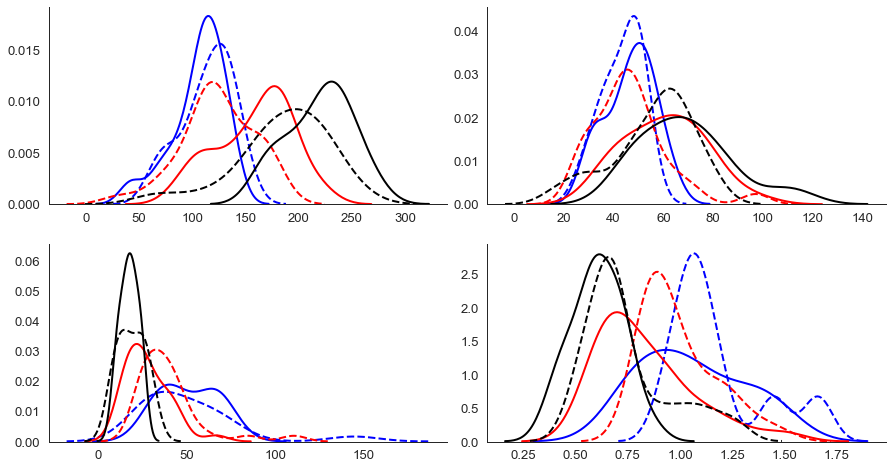

In [130]:
sns.set_style("white")
sns.set_context("paper", font_scale=1.5, rc={"lines.linewidth": 2})
l3 = MN_dev.loc[MN_dev['Conditions'] == 'Lumbar_P3']
C3 = MN_dev.loc[MN_dev['Conditions'] == 'Cervical_P3']
l7 = MN_dev.loc[MN_dev['Conditions'] == 'LumbarP7']
C7 = MN_dev.loc[MN_dev['Conditions'] == 'CervicalP7']
l14= MN_dev.loc[MN_dev['Conditions'] == 'LumbarP14']
C14 = MN_dev.loc[MN_dev['Conditions'] == 'CervicalP14']

f, axx = plt.subplots(nrows=2, ncols=2,
                        figsize=(15, 8),

                        # ensure proper width-wise spacing.
                        gridspec_kw={'wspace':0.1}
                       )

sns.distplot(l3 [['Max_FF']], hist=False, rug=False, color='blue',ax=axx.flat[0], kde_kws={'linestyle':'--'})
sns.distplot(C3[['Max_FF']], hist=False, rug=False, color='blue', ax=axx.flat[0])
sns.distplot(l7[['Max_FF']], hist=False, rug=False, color='red', ax=axx.flat[0], kde_kws={'linestyle':'--'})
sns.distplot(C7[['Max_FF']], hist=False, rug=False, color='red', ax=axx.flat[0], )
sns.distplot(l14[['Max_FF']], hist=False, rug=False, color='black', ax=axx.flat[0], kde_kws={'linestyle':'--'})
sns.distplot(C14[['Max_FF']], hist=False, rug=False,color='black', ax=axx.flat[0])
sns.despine()

sns.distplot(l3 [['maxFFsteady']], hist=False, rug=False, color='blue', ax=axx.flat[1], kde_kws={'linestyle':'--'})
sns.distplot(C3[['maxFFsteady']], hist=False, rug=False, color='blue', ax=axx.flat[1])
sns.distplot(l7[['maxFFsteady']], hist=False, rug=False, color='red', ax=axx.flat[1], kde_kws={'linestyle':'--'})
sns.distplot(C7[['maxFFsteady']], hist=False, rug=False, color='red', ax=axx.flat[1])
sns.distplot(l14[['maxFFsteady']], hist=False, rug=False, color='black', ax=axx.flat[1], kde_kws={'linestyle':'--'})
sns.distplot(C14[['maxFFsteady']], hist=False, rug=False,color='black', ax=axx.flat[1])

sns.distplot(l3 [['SS_slope']], hist=False, rug=False, color='blue', ax=axx.flat[2], kde_kws={'linestyle':'--'})
sns.distplot(C3[['SS_slope']], hist=False, rug=False, color='blue', ax=axx.flat[2])
sns.distplot(l7[['SS_slope']], hist=False, rug=False, color='red', ax=axx.flat[2], kde_kws={'linestyle':'--'})
sns.distplot(C7[['SS_slope']], hist=False, rug=False, color='red', ax=axx.flat[2])
sns.distplot(l14[['SS_slope']], hist=False, rug=False, color='black', ax=axx.flat[2], kde_kws={'linestyle':'--'})
sns.distplot(C14[['SS_slope']], hist=False, rug=False,color='black', ax=axx.flat[2])

sns.distplot(l3 [['AP_HW']], hist=False, rug=False, color='blue', ax=axx.flat[3], kde_kws={'linestyle':'--'})
sns.distplot(C3[['AP_HW']], hist=False, rug=False, color='blue', ax=axx.flat[3])
sns.distplot(l7[['AP_HW']], hist=False, rug=False, color='red', ax=axx.flat[3], kde_kws={'linestyle':'--'})
sns.distplot(C7[['AP_HW']], hist=False, rug=False, color='red', ax=axx.flat[3])
sns.distplot(l14[['AP_HW']], hist=False, rug=False, color='black', ax=axx.flat[3], kde_kws={'linestyle':'--'})
sns.distplot(C14[['AP_HW']], hist=False, rug=False,color='black', ax=axx.flat[3])

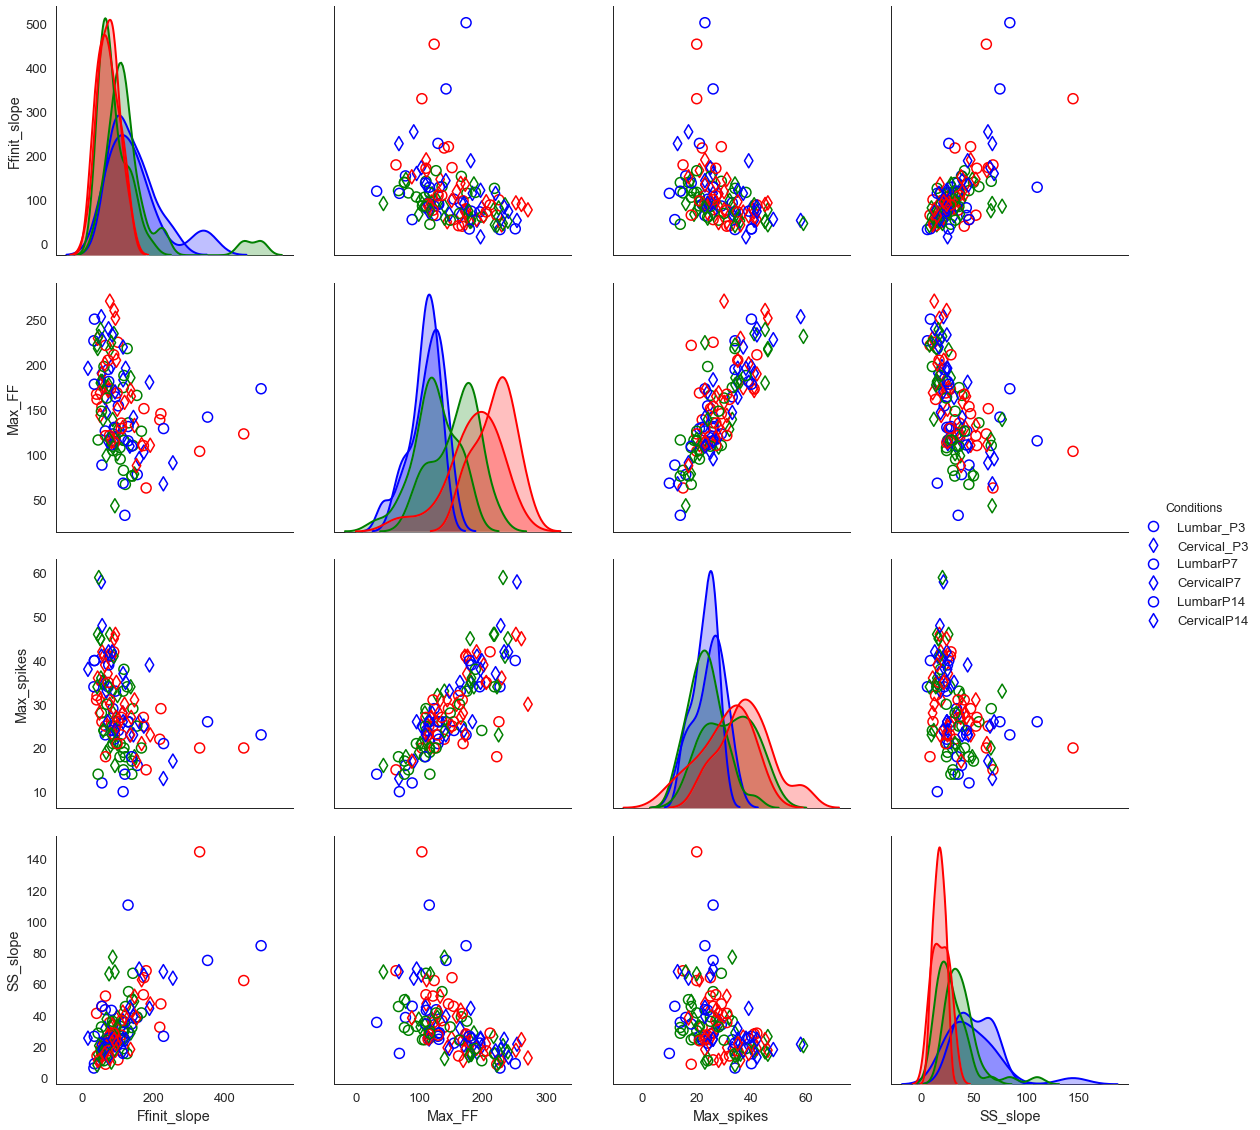

In [84]:
g = sns.pairplot(MN_dev, vars=["Ffinit_slope", "Max_FF","Max_spikes", "SS_slope"], 
                 hue="Conditions", palette=["blue","blue", "green","green", "red","red"], 
                 markers=["o","d","o","d","o","d",],
                          diag_kind="kde",  height=4,
                plot_kws=dict(s=100,linewidth=1.5, alpha=1, facecolor="none", edgecolor=["blue","blue", "red","red", "green","green"]))
# set x labels
# 1st plot
#g.axes[0,0].set_ylabel('Resistance (MO)')
#g.axes[1,0].set_ylabel('Rheobase (nA)')
#g.axes[2,0].set_ylabel('Capacitance (pF)')
#g.axes[3,0].set_ylabel('mAHP 1/2 Duration (ms)')

#g.axes[3,0].set_xlabel('Resistance (MO)')
#g.axes[3,0].set_xticks([0,25,50,75,100])
##g.axes[3,1].set_xlabel('Rheobase (nA)')
#g.axes[3,1].set_xticks([0,1,2,3, 4])
#g.axes[3,2].set_xlabel('Capacitance (pF)')
#g.axes[3,2].set_xticks([0,500,1000])
#g.axes[3,3].set_xlabel('mAHP 1/2 Duration (ms)')
#g.axes[3,3].set_xticks([0, 100,200,300])
#plt.savefig("Delayed_justification.png", dpi=800) 